# Get data

## Download data

In [95]:
'''
!wget https://reich.hms.harvard.edu/sites/reich.hms.harvard.edu/files/inline-files/1.zip
!wget https://reich.hms.harvard.edu/sites/reich.hms.harvard.edu/files/inline-files/2.zip
!wget https://reich.hms.harvard.edu/sites/reich.hms.harvard.edu/files/inline-files/3.zip
!wget https://reich.hms.harvard.edu/sites/reich.hms.harvard.edu/files/inline-files/4.zip
!wget https://reich.hms.harvard.edu/sites/reich.hms.harvard.edu/files/inline-files/5.zip

!wget https://reich.hms.harvard.edu/sites/reich.hms.harvard.edu/files/inline-files/Readme_0.zip
'''

'\n!wget https://reich.hms.harvard.edu/sites/reich.hms.harvard.edu/files/inline-files/1.zip\n!wget https://reich.hms.harvard.edu/sites/reich.hms.harvard.edu/files/inline-files/2.zip\n!wget https://reich.hms.harvard.edu/sites/reich.hms.harvard.edu/files/inline-files/3.zip\n!wget https://reich.hms.harvard.edu/sites/reich.hms.harvard.edu/files/inline-files/4.zip\n!wget https://reich.hms.harvard.edu/sites/reich.hms.harvard.edu/files/inline-files/5.zip\n\n!wget https://reich.hms.harvard.edu/sites/reich.hms.harvard.edu/files/inline-files/Readme_0.zip\n'

In [90]:
!wget https://hgdownload.soe.ucsc.edu/goldenPath/hg19/database/snp151.txt.gz

--2023-05-06 18:03:25--  https://hgdownload.soe.ucsc.edu/goldenPath/hg19/database/snp151.txt.gz
Resolving hgdownload.soe.ucsc.edu (hgdownload.soe.ucsc.edu)... 128.114.119.163
Connecting to hgdownload.soe.ucsc.edu (hgdownload.soe.ucsc.edu)|128.114.119.163|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13136023820 (12G) [application/x-gzip]
Saving to: ‘snp151.txt.gz’

snp151.txt.gz       100%[===================>]  12.23G  10.7MB/s    in 18m 35s 

2023-05-06 18:22:01 (11.2 MB/s) - ‘snp151.txt.gz’ saved [13136023820/13136023820]



## Path constants

In [1]:
DATA_DIR = '/home/skomlev/data/neanderthal'
N1_DIR = DATA_DIR + '/N1'
N2_DIR = DATA_DIR + '/N2'
N3_DIR = DATA_DIR + '/N3'
N4_DIR = DATA_DIR + '/N4'
N5_DIR = DATA_DIR + '/N5'

N1_PATH_ZIP = DATA_DIR + '/1.zip'
N2_PATH_ZIP = DATA_DIR + '/2.zip'
N3_PATH_ZIP = DATA_DIR + '/3.zip'
N4_PATH_ZIP = DATA_DIR + '/4.zip'
N5_PATH_ZIP = DATA_DIR + '/5.zip'

In [2]:
'''
!mkdir $N5_DIR
!unzip $N5_PATH_ZIP -d $N5_DIR
'''

'\n!mkdir $N5_DIR\n!unzip $N5_PATH_ZIP -d $N5_DIR\n'

In [3]:
N1_CHR_1_SNP_PATH_GZ = N1_DIR + '/snp/chr-1.snp.gz'
N1_CHR_1_SNP_PATH = N1_CHR_1_SNP_PATH_GZ.rstrip('.gz')

N1_CHR_2_SNP_PATH_GZ = N1_DIR + '/snp/chr-2.snp.gz'
N1_CHR_2_SNP_PATH = N1_CHR_2_SNP_PATH_GZ.rstrip('.gz')

N1_CHR_1_HAPMAP_GZ = N1_DIR + '/EUR-ASN.hapmap/summaries/chr-1.thresh-90.length-0.00.gz'
N1_CHR_1_HAPMAP = N1_CHR_1_HAPMAP_GZ.rstrip('.gz')

N5_CEU_HTYPES_CHR_1_GZ = N5_DIR + '/CEU.hapmap/summaries/haplotypes/chr-1.thresh-90.length-0.00.haplotypes.gz'
N5_CEU_HTYPES_CHR_1 = N5_CEU_HTYPES_CHR_1_GZ.rstrip('.gz')

In [200]:
#!gzip -dk $N5_CEU_HTYPES_CHR_1_GZ

# SNP dir processing

## Transform snp data

In [4]:
SNP_DIR = '/home/skomlev/data/neanderthal/N1/snp'

In [5]:
'''!gzip -dk $SNP_DIR/*.gz*
!mkdir $SNP_DIR/zipped
!mv $SNP_DIR/*.gz* $SNP_DIR/zipped'''

'!gzip -dk $SNP_DIR/*.gz*\n!mkdir $SNP_DIR/zipped\n!mv $SNP_DIR/*.gz* $SNP_DIR/zipped'

**Headers:**
1. snp id 
2. chromosome
3. genetic position
4. physical position (hg19,1-based coords)
5. derived allele
6. ancestral allele

In [6]:
cols_snp = ['snp_id','chrom','gen_pos','phys_pos','der_allele','anc_allele']

In [7]:
import pandas as pd

In [8]:
!head $N1_CHR_1_SNP_PATH

1:416202 1 0.009803 416202 T G
1:522476 1 0.013368 522476 T A
1:523471 1 0.013402 523471 T C
1:526057 1 0.013488 526057 C T
1:526692 1 0.013510 526692 T C
1:526735 1 0.013511 526735 T C
1:526771 1 0.013512 526771 C G
1:527157 1 0.013525 527157 G A
1:527186 1 0.013526 527186 G A
1:527207 1 0.013527 527207 G A


In [10]:
snp1 = pd.read_csv(N1_CHR_1_SNP_PATH, sep=' ', names=cols_snp, index_col=False)
snp1

,snp_id,chrom,gen_pos,phys_pos,der_allele,anc_allele
0,1:416202,1,0.009803,416202,T,G
1,1:522476,1,0.013368,522476,T,A
2,1:523471,1,0.013402,523471,T,C
3,1:526057,1,0.013488,526057,C,T
4,1:526692,1,0.013510,526692,T,C
...,...,...,...,...,...,...
2626225,1:249211925,1,2.862737,249211925,A,G
2626226,1:249211967,1,2.862738,249211967,A,G
2626227,1:249212011,1,2.862738,249212011,T,G
2626228,1:249212025,1,2.862738,249212025,T,C


In [141]:
3200000000 * 0.02

64000000.0

## Create hg19 derived-ancestry bed file

In [148]:
#!wget http://hgdownload.soe.ucsc.edu/goldenPath/hg19/liftOver/hg19ToHg38.over.chain.gz

In [146]:
CHAIN_19_TO_38 = '/home/skomlev/data/bio_utils/hg19ToHg38.over.chain'

In [171]:
!ls /mnt/Storage/databases/reference/GRCh38.d1.vd1.dict

/mnt/Storage/databases/reference/GRCh38.d1.vd1.dict


In [180]:
!head chr1_der_anc_hg19.tsv

#coord_hg19	der_allele	anc_allele
chr1:416202-416202	T	G
chr1:522476-522476	T	A
chr1:523471-523471	T	C
chr1:526057-526057	C	T
chr1:526692-526692	T	C
chr1:526735-526735	T	C
chr1:526771-526771	C	G
chr1:527157-527157	G	A
chr1:527186-527186	G	A


In [176]:
!java -jar /home/oklimchuk/gatk.jar LiftOverIntervalList \
--CHAIN $CHAIN_19_TO_38 \
-I chr1_der_anc_hg19.tsv \
-O der_anc_hg38.bed \
-SD /mnt/Storage/databases/reference/GRCh38.d1.vd1.dict

14:36:54.996 INFO  NativeLibraryLoader - Loading libgkl_compression.so from jar:file:/home/oklimchuk/gatk.jar!/com/intel/gkl/native/libgkl_compression.so
[Wed Apr 26 14:36:55 MSK 2023] LiftOverIntervalList --INPUT chr1_der_anc_hg19.tsv --OUTPUT der_anc_hg38.bed --SEQUENCE_DICTIONARY /mnt/Storage/databases/reference/GRCh38.d1.vd1.dict --CHAIN /home/skomlev/data/bio_utils/hg19ToHg38.over.chain --MIN_LIFTOVER_PCT 0.95 --VERBOSITY INFO --QUIET false --VALIDATION_STRINGENCY STRICT --COMPRESSION_LEVEL 2 --MAX_RECORDS_IN_RAM 500000 --CREATE_INDEX false --CREATE_MD5_FILE false --GA4GH_CLIENT_SECRETS client_secrets.json --help false --version false --showHidden false --USE_JDK_DEFLATER false --USE_JDK_INFLATER false
[Wed Apr 26 14:36:55 MSK 2023] Executing as skomlev@gpc-hpc-gpu-01 on Linux 5.15.0-52-generic amd64; OpenJDK 64-Bit Server VM 11.0.18+10-post-Ubuntu-0ubuntu120.04.1; Deflater: Intel; Inflater: Intel; Provider GCS is available; Picard version: Version:4.3.0.0
[Wed Apr 26 14:36:55 MSK

In [193]:
#!java -jar /home/oklimchuk/gatk.jar LiftOverIntervalList --help

In [151]:
chr1:416202-416202
chr1:522476-522476
chr1:523471-523471
chr1:526057-526057
chr1:526692-526692
chr1:526735-526735
chr1:526771-526771
chr1:527157-527157
chr1:527186-527186

In [191]:
#snp1 = snp1.drop('chr',axis=1)

In [190]:
snp1

,snp_id,chrom,gen_pos,phys_pos,der_allele,anc_allele,#coord_hg19,chrom_num
0,1:416202,chr1,0.009803,416202,T,G,chr1:416202-416202,1
1,1:522476,chr1,0.013368,522476,T,A,chr1:522476-522476,1
2,1:523471,chr1,0.013402,523471,T,C,chr1:523471-523471,1
3,1:526057,chr1,0.013488,526057,C,T,chr1:526057-526057,1
4,1:526692,chr1,0.013510,526692,T,C,chr1:526692-526692,1
...,...,...,...,...,...,...,...,...
2626225,1:249211925,chr1,2.862737,249211925,A,G,chr1:249211925-249211925,1
2626226,1:249211967,chr1,2.862738,249211967,A,G,chr1:249211967-249211967,1
2626227,1:249212011,chr1,2.862738,249212011,T,G,chr1:249212011-249212011,1
2626228,1:249212025,chr1,2.862738,249212025,T,C,chr1:249212025-249212025,1


chr1:416202-416202 -> chr1 416201 416202

In [197]:
snp1['chromStart'] = snp1['phys_pos'] - 1
snp1['chromEnd'] = snp1['phys_pos']
snp1['der_anc'] = snp1['der_allele'] + '_' + snp1['anc_allele']
snp1

,snp_id,chrom,gen_pos,phys_pos,der_allele,anc_allele,#coord_hg19,chrom_num,chromStart,chromEnd,der_anc
0,1:416202,chr1,0.009803,416202,T,G,chr1:416202-416202,1,416201,416202,T_G
1,1:522476,chr1,0.013368,522476,T,A,chr1:522476-522476,1,522475,522476,T_A
2,1:523471,chr1,0.013402,523471,T,C,chr1:523471-523471,1,523470,523471,T_C
3,1:526057,chr1,0.013488,526057,C,T,chr1:526057-526057,1,526056,526057,C_T
4,1:526692,chr1,0.013510,526692,T,C,chr1:526692-526692,1,526691,526692,T_C
...,...,...,...,...,...,...,...,...,...,...,...
2626225,1:249211925,chr1,2.862737,249211925,A,G,chr1:249211925-249211925,1,249211924,249211925,A_G
2626226,1:249211967,chr1,2.862738,249211967,A,G,chr1:249211967-249211967,1,249211966,249211967,A_G
2626227,1:249212011,chr1,2.862738,249212011,T,G,chr1:249212011-249212011,1,249212010,249212011,T_G
2626228,1:249212025,chr1,2.862738,249212025,T,C,chr1:249212025-249212025,1,249212024,249212025,T_C


In [211]:
cols_to_convert = ['chrom','chromStart','chromEnd','der_anc']

In [212]:
#snp1[cols_to_convert].to_csv('chr1_der_anc_hg19.bed', sep=' ', index=False, header=False)

In [192]:
'''
snp1['chrom_num'] = snp1['chrom']
snp1['chrom'] = 'chr' + snp1['chrom']
'''

"\nsnp1['chrom_num'] = snp1['chrom']\nsnp1['chrom'] = 'chr' + snp1['chrom']\n"

In [194]:
snp1 = snp1.astype({'chrom':'str',
            'phys_pos':'int64'})

In [174]:
snp1['#coord_hg19'] = 'chr' + snp1['chrom'] + ':' + snp1['phys_pos'] + '-' + snp1['phys_pos']
snp1

,snp_id,chrom,gen_pos,phys_pos,der_allele,anc_allele,LiftOver,#coord_hg19
0,1:416202,1,0.009803,416202,T,G,chr1:416202-416202,chr1:416202-416202
1,1:522476,1,0.013368,522476,T,A,chr1:522476-522476,chr1:522476-522476
2,1:523471,1,0.013402,523471,T,C,chr1:523471-523471,chr1:523471-523471
3,1:526057,1,0.013488,526057,C,T,chr1:526057-526057,chr1:526057-526057
4,1:526692,1,0.013510,526692,T,C,chr1:526692-526692,chr1:526692-526692
...,...,...,...,...,...,...,...,...
2626225,1:249211925,1,2.862737,249211925,A,G,chr1:249211925-249211925,chr1:249211925-249211925
2626226,1:249211967,1,2.862738,249211967,A,G,chr1:249211967-249211967,chr1:249211967-249211967
2626227,1:249212011,1,2.862738,249212011,T,G,chr1:249212011-249212011,chr1:249212011-249212011
2626228,1:249212025,1,2.862738,249212025,T,C,chr1:249212025-249212025,chr1:249212025-249212025


In [175]:
snp1[['#coord_hg19','der_allele','anc_allele']].to_csv('chr1_der_anc_hg19.tsv', sep='\t', index=False)#, header=False)

In [170]:
snp1[['LiftOver']].to_csv('chr1_derived_ancestry_hg19_coords.tsv', sep='\t', index=False, header=False)

In [169]:
!head chr1_derived_ancestry_hg19.tsv

chr1:416202-416202	T	G
chr1:522476-522476	T	A
chr1:523471-523471	T	C
chr1:526057-526057	C	T
chr1:526692-526692	T	C
chr1:526735-526735	T	C
chr1:526771-526771	C	G
chr1:527157-527157	G	A
chr1:527186-527186	G	A
chr1:527207-527207	G	A


## Transform der-anc hg38 converted file

### Transform der-anc snp file

Conversion tool: https://genome.ucsc.edu/cgi-bin/hgLiftOver

In [13]:
DER_ANC_38_CONV = DATA_DIR + '/my_data/chr1_der_anc_hg38_converted.bed'

NameError: name 'DATA_DIR' is not defined

In [208]:
!head $DER_ANC_38_CONV

chr1	403134	403135	T_G	1
chr1	587095	587096	T_A	1
chr1	588090	588091	T_C	1
chr1	590676	590677	C_T	1
chr1	591311	591312	T_C	1
chr1	591354	591355	T_C	1
chr1	591390	591391	C_G	1
chr1	591776	591777	G_A	1
chr1	591805	591806	G_A	1
chr1	591826	591827	G_A	1


In [213]:
cols_to_convert

['chrom', 'chromStart', 'chromEnd', 'der_anc']

In [216]:
snp1_38 = pd.read_csv(DER_ANC_38_CONV, sep='\t', names=cols_to_convert, usecols=[i for i in range(4)])
snp1_38

,chrom,chromStart,chromEnd,der_anc
0,chr1,403134,403135,T_G
1,chr1,587095,587096,T_A
2,chr1,588090,588091,T_C
3,chr1,590676,590677,C_T
4,chr1,591311,591312,T_C
...,...,...,...,...
2625747,chr1,248917725,248917726,A_G
2625748,chr1,248917767,248917768,A_G
2625749,chr1,248917811,248917812,T_G
2625750,chr1,248917825,248917826,T_C


In [217]:
snp1_38[['derived','ancestral']] = snp1_38['der_anc'].str.split('_',expand=True)
snp1_38

,chrom,chromStart,chromEnd,der_anc,derived,ancestral
0,chr1,403134,403135,T_G,T,G
1,chr1,587095,587096,T_A,T,A
2,chr1,588090,588091,T_C,T,C
3,chr1,590676,590677,C_T,C,T
4,chr1,591311,591312,T_C,T,C
...,...,...,...,...,...,...
2625747,chr1,248917725,248917726,A_G,A,G
2625748,chr1,248917767,248917768,A_G,A,G
2625749,chr1,248917811,248917812,T_G,T,G
2625750,chr1,248917825,248917826,T_C,T,C


### Transform target vcf file

In [223]:
DV_NA24385 = '/home/skomlev/data/DeepVar_Opt_data/test_out/dv_full.tsv'

In [224]:
!head $DV_NA24385

CHROM	POS	ID	REF	ALT	QUAL	FILTER	INFO	FORMAT	NA24385
chr1	10352	.	T	TA	4	PASS	.	GT:GQ:DP:AD:VAF:PL	1/1:3:6:3,2:0.333333:0,5,0
chr1	10389	.	AC	A	7.2	PASS	.	GT:GQ:DP:AD:VAF:PL	1/1:3:7:4,2:0.285714:4,2,0
chr1	13613	.	T	A	13.3	PASS	.	GT:GQ:DP:AD:VAF:PL	1/1:10:5:0,5:1:12,13,0
chr1	13684	.	C	T	13.8	PASS	.	GT:GQ:DP:AD:VAF:PL	1/1:11:3:0,3:1:13,13,0
chr1	13813	.	T	G	11.6	PASS	.	GT:GQ:DP:AD:VAF:PL	1/1:9:5:0,5:1:11,12,0
chr1	13838	.	C	T	12	PASS	.	GT:GQ:DP:AD:VAF:PL	1/1:9:5:0,5:1:11,11,0
chr1	14210	.	G	A	3.8	PASS	.	GT:GQ:DP:AD:VAF:PL	0/1:2:5:2,3:0.6:0,0,4
chr1	14604	.	A	G	6.9	PASS	.	GT:GQ:DP:AD:VAF:PL	0/1:6:13:9,4:0.307692:5,0,15
chr1	14653	.	C	T	6.3	PASS	.	GT:GQ:DP:AD:VAF:PL	1/1:3:7:2,5:0.714286:3,3,0


In [225]:
dvf = pd.read_csv(DV_NA24385, sep='\t')
dvf

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,NA24385
0,chr1,10352,.,T,TA,4.0,PASS,.,GT:GQ:DP:AD:VAF:PL,"1/1:3:6:3,2:0.333333:0,5,0"
1,chr1,10389,.,AC,A,7.2,PASS,.,GT:GQ:DP:AD:VAF:PL,"1/1:3:7:4,2:0.285714:4,2,0"
2,chr1,13613,.,T,A,13.3,PASS,.,GT:GQ:DP:AD:VAF:PL,"1/1:10:5:0,5:1:12,13,0"
3,chr1,13684,.,C,T,13.8,PASS,.,GT:GQ:DP:AD:VAF:PL,"1/1:11:3:0,3:1:13,13,0"
4,chr1,13813,.,T,G,11.6,PASS,.,GT:GQ:DP:AD:VAF:PL,"1/1:9:5:0,5:1:11,12,0"
...,...,...,...,...,...,...,...,...,...,...
4584820,chr22,50807889,.,C,G,25.1,PASS,.,GT:GQ:DP:AD:VAF:PL,"1/1:25:10:0,9:0.9:25,40,0"
4584821,chr22,50807905,.,T,A,4.2,PASS,.,GT:GQ:DP:AD:VAF:PL,"1/1:4:9:2,7:0.777778:2,14,0"
4584822,chr22,50807909,.,G,T,4.6,PASS,.,GT:GQ:DP:AD:VAF:PL,"1/1:4:10:3,7:0.7:2,16,0"
4584823,chr22,50807933,.,G,T,5.5,PASS,.,GT:GQ:DP:AD:VAF:PL,"0/1:5:13:10,3:0.230769:3,0,11"


In [239]:
dvf_snp1 = dvf.loc[(dvf['CHROM'] == 'chr1') & (dvf['REF'].str.len() == dvf['ALT'].str.len()),
                   ['CHROM','POS','REF','ALT','QUAL','FORMAT','NA24385']]
dvf_snp1

,CHROM,POS,REF,ALT,QUAL,FORMAT,NA24385
2,chr1,13613,T,A,13.3,GT:GQ:DP:AD:VAF:PL,"1/1:10:5:0,5:1:12,13,0"
3,chr1,13684,C,T,13.8,GT:GQ:DP:AD:VAF:PL,"1/1:11:3:0,3:1:13,13,0"
4,chr1,13813,T,G,11.6,GT:GQ:DP:AD:VAF:PL,"1/1:9:5:0,5:1:11,12,0"
5,chr1,13838,C,T,12.0,GT:GQ:DP:AD:VAF:PL,"1/1:9:5:0,5:1:11,11,0"
6,chr1,14210,G,A,3.8,GT:GQ:DP:AD:VAF:PL,"0/1:2:5:2,3:0.6:0,0,4"
...,...,...,...,...,...,...,...
365672,chr1,248945460,T,G,10.6,GT:GQ:DP:AD:VAF:PL,"0/1:11:40:31,9:0.225:10,0,39"
365673,chr1,248945573,A,C,3.1,GT:GQ:DP:AD:VAF:PL,"0/1:3:32:18,13:0.40625:0,0,28"
365674,chr1,248945670,C,G,11.4,GT:GQ:DP:AD:VAF:PL,"1/1:11:20:1,19:0.95:11,19,0"
365675,chr1,248945674,G,A,11.3,GT:GQ:DP:AD:VAF:PL,"1/1:11:19:0,19:1:10,20,0"


In [245]:
def extract_vcf_features(vcf_df: pd.DataFrame, sample_name: str = 'SAMPLE', is_id: bool = True) -> pd.DataFrame:
    vcf_df[['GT','GQ','DP','AD','VAF','PL']] = vcf_df[sample_name].str.split(':',expand=True)
    vcf_df[['PL_0/0','PL_0/1','PL_1/1']] = vcf_df['PL'].str.split(',',expand=True)
    vcf_df[['AD_ref','AD_alt']] = vcf_df['AD'].str.split(',',expand=True)
    vcf_df['CHROM_num'] = vcf_df['CHROM'].str.split('r',expand=True)[1]
    
    vcf_df['ref_alt_diff'] = abs(vcf_df['REF'].str.len() - vcf_df['ALT'].str.len())
    
    if is_id:
        vcf_df.index = vcf_df['ID']
    vcf_df = vcf_df[['POS','GT','REF','ALT','GQ','DP',]]

    vcf_dtypes = {'CHROM_num': 'int32',
              'GQ': 'int32','DP': 'int32','VAF': 'float64',
              'AD_ref': 'int32','AD_alt': 'int32',
              'PL_0/0': 'int32','PL_0/1': 'int32','PL_1/1': 'int32'}
    #vcf_df = vcf_df.astype(vcf_dtypes)
    
    return vcf_df

In [246]:
dvf_snp1_t = extract_vcf_features(dvf_snp1,'NA24385',False)
dvf_snp1_t

,POS,GT,REF,ALT,GQ,DP
2,13613,1/1,T,A,10,5
3,13684,1/1,C,T,11,3
4,13813,1/1,T,G,9,5
5,13838,1/1,C,T,9,5
6,14210,0/1,G,A,2,5
...,...,...,...,...,...,...
365672,248945460,0/1,T,G,11,40
365673,248945573,0/1,A,C,3,32
365674,248945670,1/1,C,G,11,20
365675,248945674,1/1,G,A,11,19


In [259]:
dvf_snp1_t['allele_1_2'] = dvf_snp1_t['REF'] + '_' + dvf_snp1_t['ALT']
dvf_snp1_t.loc[dvf_snp1_t['GT'] == '1/1', 'allele_1_2'] = dvf_snp1_t['ALT'] + '_' + dvf_snp1_t['ALT']

/tmp/ipykernel_2536876/1176088303.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dvf_snp1_t['allele_1_2'] = dvf_snp1_t['REF'] + '_' + dvf_snp1_t['ALT']


In [260]:
dvf_snp1_t

,POS,GT,REF,ALT,GQ,DP,chromStart,allele_1_2
2,13613,1/1,T,A,10,5,13613,A_A
3,13684,1/1,C,T,11,3,13684,T_T
4,13813,1/1,T,G,9,5,13813,G_G
5,13838,1/1,C,T,9,5,13838,T_T
6,14210,0/1,G,A,2,5,14210,G_A
...,...,...,...,...,...,...,...,...
365672,248945460,0/1,T,G,11,40,248945460,T_G
365673,248945573,0/1,A,C,3,32,248945573,A_C
365674,248945670,1/1,C,G,11,20,248945670,G_G
365675,248945674,1/1,G,A,11,19,248945674,A_A


In [261]:
dvf_snp1_t[['allele_1','allele_2']] = dvf_snp1_t['allele_1_2'].str.split('_',expand=True)
dvf_snp1_t

/tmp/ipykernel_2536876/2151839126.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dvf_snp1_t[['allele_1','allele_2']] = dvf_snp1_t['allele_1_2'].str.split('_',expand=True)
/tmp/ipykernel_2536876/2151839126.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dvf_snp1_t[['allele_1','allele_2']] = dvf_snp1_t['allele_1_2'].str.split('_',expand=True)


,POS,GT,REF,ALT,GQ,DP,chromStart,allele_1_2,allele_1,allele_2
2,13613,1/1,T,A,10,5,13613,A_A,A,A
3,13684,1/1,C,T,11,3,13684,T_T,T,T
4,13813,1/1,T,G,9,5,13813,G_G,G,G
5,13838,1/1,C,T,9,5,13838,T_T,T,T
6,14210,0/1,G,A,2,5,14210,G_A,G,A
...,...,...,...,...,...,...,...,...,...,...
365672,248945460,0/1,T,G,11,40,248945460,T_G,T,G
365673,248945573,0/1,A,C,3,32,248945573,A_C,A,C
365674,248945670,1/1,C,G,11,20,248945670,G_G,G,G
365675,248945674,1/1,G,A,11,19,248945674,A_A,A,A


In [249]:
dvf_snp1_t['chromStart'] = dvf_snp1_t['POS']
dvf_snp1_t

/tmp/ipykernel_2536876/2664754912.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dvf_snp1_t['chromStart'] = dvf_snp1_t['POS']


,POS,GT,REF,ALT,GQ,DP,chromStart
2,13613,1/1,T,A,10,5,13613
3,13684,1/1,C,T,11,3,13684
4,13813,1/1,T,G,9,5,13813
5,13838,1/1,C,T,9,5,13838
6,14210,0/1,G,A,2,5,14210
...,...,...,...,...,...,...,...
365672,248945460,0/1,T,G,11,40,248945460
365673,248945573,0/1,A,C,3,32,248945573
365674,248945670,1/1,C,G,11,20,248945670
365675,248945674,1/1,G,A,11,19,248945674


## Intersect vcf with Neanderthal

In [ ]:
dvf_snp1_t

In [247]:
snp1_38

,chrom,chromStart,chromEnd,der_anc,derived,ancestral
0,chr1,403134,403135,T_G,T,G
1,chr1,587095,587096,T_A,T,A
2,chr1,588090,588091,T_C,T,C
3,chr1,590676,590677,C_T,C,T
4,chr1,591311,591312,T_C,T,C
...,...,...,...,...,...,...
2625747,chr1,248917725,248917726,A_G,A,G
2625748,chr1,248917767,248917768,A_G,A,G
2625749,chr1,248917811,248917812,T_G,T,G
2625750,chr1,248917825,248917826,T_C,T,C


In [262]:
intersec = pd.merge(dvf_snp1_t, snp1_38, how ='left', on =['chromStart'])
intersec

,POS,GT,REF,ALT,GQ,DP,chromStart,allele_1_2,allele_1,allele_2,chrom,chromEnd,der_anc,derived,ancestral
0,13613,1/1,T,A,10,5,13613,A_A,A,A,NaN,NaN,NaN,NaN,NaN
1,13684,1/1,C,T,11,3,13684,T_T,T,T,NaN,NaN,NaN,NaN,NaN
2,13813,1/1,T,G,9,5,13813,G_G,G,G,NaN,NaN,NaN,NaN,NaN
3,13838,1/1,C,T,9,5,13838,T_T,T,T,NaN,NaN,NaN,NaN,NaN
4,14210,0/1,G,A,2,5,14210,G_A,G,A,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300074,248945460,0/1,T,G,11,40,248945460,T_G,T,G,NaN,NaN,NaN,NaN,NaN
300075,248945573,0/1,A,C,3,32,248945573,A_C,A,C,NaN,NaN,NaN,NaN,NaN
300076,248945670,1/1,C,G,11,20,248945670,G_G,G,G,NaN,NaN,NaN,NaN,NaN
300077,248945674,1/1,G,A,11,19,248945674,A_A,A,A,NaN,NaN,NaN,NaN,NaN


In [263]:
inter = intersec.dropna()
inter

,POS,GT,REF,ALT,GQ,DP,chromStart,allele_1_2,allele_1,allele_2,chrom,chromEnd,der_anc,derived,ancestral
575,951408,1/1,G,A,51,29,951408,A_A,A,A,chr1,951409.0,A_G,A,G
581,953778,1/1,G,C,58,40,953778,C_C,C,C,chr1,953779.0,A_C,A,C
584,954333,1/1,C,A,57,31,954333,A_A,A,A,chr1,954334.0,G_T,G,T
602,964557,1/1,G,T,14,5,964557,T_T,T,T,chr1,964558.0,C_G,C,G
608,964905,1/1,C,T,47,15,964905,T_T,T,T,chr1,964906.0,A_G,A,G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299895,248810645,0/1,C,T,43,25,248810645,C_T,C,T,chr1,248810646.0,G_T,G,T
299899,248814441,1/1,C,T,56,27,248814441,T_T,T,T,chr1,248814442.0,A_G,A,G
299915,248823521,0/1,T,C,43,36,248823521,T_C,T,C,chr1,248823522.0,C_A,C,A
299950,248833358,0/1,A,G,48,29,248833358,A_G,A,G,chr1,248833359.0,A_G,A,G


In [55]:
na_drop_rate_lifted_over = 1 - 6430/300079
na_drop_rate_lifted_over

0.9785723092918864

In [270]:
inter = inter[['POS','REF','allele_1','allele_2','derived','ancestral']]
inter

,POS,REF,allele_1,allele_2,derived,ancestral
575,951408,G,A,A,A,G
581,953778,G,C,C,A,C
584,954333,C,A,A,G,T
602,964557,G,T,T,C,G
608,964905,C,T,T,A,G
...,...,...,...,...,...,...
299895,248810645,C,C,T,G,T
299899,248814441,C,T,T,A,G
299915,248823521,T,T,C,C,A
299950,248833358,A,A,G,A,G


In [284]:
3776 / 6430

0.5872472783825816

In [288]:
inter[(inter['allele_1']!=inter['derived']) & (inter['allele_1']!=inter['ancestral']) & (inter['allele_1']!=inter['REF']) &
     (inter['allele_2']!=inter['derived']) & (inter['allele_2']!=inter['ancestral']) & (inter['allele_2']!=inter['REF'])]

,POS,REF,allele_1,allele_2,derived,ancestral
584,954333,C,A,A,G,T
602,964557,G,T,T,C,G
608,964905,C,T,T,A,G
631,975523,T,C,C,A,G
654,985268,T,C,C,A,G
...,...,...,...,...,...,...
298456,247841575,C,T,T,A,G
298563,247887692,T,C,C,A,G
298636,247906635,C,T,T,A,G
298925,248086593,A,G,G,T,A


In [275]:
good = inter[(inter['allele_1']==inter['derived']) | (inter['allele_1']==inter['ancestral']) |
     (inter['allele_2']==inter['derived']) | (inter['allele_2']==inter['ancestral'])]
good

,POS,REF,allele_1,allele_2,derived,ancestral
575,951408,G,A,A,A,G
581,953778,G,C,C,A,C
649,984039,T,T,C,T,G
907,1131448,C,C,G,T,G
985,1306523,C,G,G,A,G
...,...,...,...,...,...,...
298606,247898456,C,T,T,T,G
298918,248078962,A,G,G,G,C
299895,248810645,C,C,T,G,T
299915,248823521,T,T,C,C,A


In [277]:
good['neand_score'] = 0
good.loc[good['allele_1'] == good['derived'], 'neand_score'] = good['neand_score'] + 1
good.loc[good['allele_2'] == good['derived'], 'neand_score'] = good['neand_score'] + 1
good

/tmp/ipykernel_2536876/4183056931.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good['neand_score'] = 0


,POS,REF,allele_1,allele_2,derived,ancestral,neand_score
575,951408,G,A,A,A,G,2
581,953778,G,C,C,A,C,0
649,984039,T,T,C,T,G,1
907,1131448,C,C,G,T,G,0
985,1306523,C,G,G,A,G,0
...,...,...,...,...,...,...,...
298606,247898456,C,T,T,T,G,2
298918,248078962,A,G,G,G,C,2
299895,248810645,C,C,T,G,T,0
299915,248823521,T,T,C,C,A,1


In [282]:
good['neand_score'].sum() / ((good.shape[0] + 3776) * 2)

0.1660186625194401

In [286]:
good['neand_score'].sum() / (300079 * 0.587) * 100

1.2120601540856024

In [274]:
3776 + 2654

6430

In [253]:
set(intersec.der_anc)

{'A_C',
 'A_G',
 'A_T',
 'C_A',
 'C_G',
 'C_T',
 'G_A',
 'G_C',
 'G_T',
 'T_A',
 'T_C',
 'T_G',
 nan}

In [256]:
set(inter.GT)

{'0/1', '1/1'}

## Test on hg19 genome

### VCF to DF

In [290]:
#!wget https://s3.eu-central-1.amazonaws.com/platinum-genomes/2017-1.0/hg19/small_variants/NA12878/NA12878.vcf.gz

In [14]:
NA12878_HG_19 = '/home/skomlev/data/VCF/NA12878_hg19.vcf'

In [15]:
!head -50 $NA12878_HG_19

##fileformat=VCFv4.1
##FILTER=<ID=PASS,Description="All filters passed">
##fileDate=2016-06-05
##source=IlluminaPlatinumGenomes, version: 2016-1.0
##reference=hg19
##contig=<ID=chr1,length=249250621>
##contig=<ID=chr2,length=243199373>
##contig=<ID=chr3,length=198022430>
##contig=<ID=chr4,length=191154276>
##contig=<ID=chr5,length=180915260>
##contig=<ID=chr6,length=171115067>
##contig=<ID=chr7,length=159138663>
##contig=<ID=chr8,length=146364022>
##contig=<ID=chr9,length=141213431>
##contig=<ID=chr10,length=135534747>
##contig=<ID=chr11,length=135006516>
##contig=<ID=chr12,length=133851895>
##contig=<ID=chr13,length=115169878>
##contig=<ID=chr14,length=107349540>
##contig=<ID=chr15,length=102531392>
##contig=<ID=chr16,length=90354753>
##contig=<ID=chr17,length=81195210>
##contig=<ID=chr18,length=78077248>
##contig=<ID=chr19,length=59128983>
##contig=<ID=chr20,length=63025520>
##contig=<ID=chr21,length=48129895>
##contig=<ID=chr22,length=51304566>
##contig=<ID=chrX,length=155270560>
##

In [16]:
from my_libs.vcf_parser import vcf_to_tsv, vcf_tsv_to_df

In [17]:
vcf_to_tsv(vcf_path=NA12878_HG_19, tsv_path='NA12878_hg19.tsv')

In [18]:
!head NA12878_hg19.tsv

CHROM	POS	ID	REF	ALT	QUAL	FILTER	INFO	FORMAT	NA12878
chr1	126113	.	C	A	.	PASS	MTD=isaac_strelka,bwa_freebayes,bwa_platypus,bwa_gatk;KM=17.27;KFP=0;KFF=0	GT	1|1
chr1	534324	.	G	T	.	PASS	MTD=bwa_freebayes;KM=1.48;KFP=5;KFF=0	GT	0|1
chr1	550515	.	T	C	.	PASS	MTD=bwa_freebayes;KM=5.00;KFP=0;KFF=0	GT	0|1
chr1	565419	.	C	G	.	PASS	MTD=bwa_freebayes;KM=10.50;KFP=1;KFF=0	GT	1|0
chr1	567239	.	CG	C	.	PASS	MTD=isaac_strelka,bwa_platypus,bwa_gatk;KM=11.15;KFP=0;KFF=0	GT	1|1
chr1	655642	.	G	A	.	PASS	MTD=bwa_gatk;KM=12.60;KFP=0;KFF=0	GT	0|1
chr1	662857	.	G	A	.	PASS	MTD=bwa_gatk;KM=6.95;KFP=0;KFF=0	GT	1|1
chr1	663097	.	G	C	.	PASS	MTD=bwa_platypus,bwa_gatk;KM=11.32;KFP=0;KFF=0	GT	1|1
chr1	666543	.	G	A	.	PASS	MTD=bwa_freebayes;KM=5.00;KFP=0;KFF=0	GT	0|1


In [19]:
pt19 = vcf_tsv_to_df('NA12878_hg19.tsv')
pt19

,CHROM,POS,ID,REF,ALT,QUAL,FORMAT,SAMPLE
0,chr1,126113,0,C,A,.,GT,1|1
1,chr1,534324,1,G,T,.,GT,0|1
2,chr1,550515,2,T,C,.,GT,0|1
3,chr1,565419,3,C,G,.,GT,1|0
4,chr1,567239,4,CG,C,.,GT,1|1
...,...,...,...,...,...,...,...,...
4049507,chrX,154902439,4049507,T,C,.,GT,1|0
4049508,chrX,154902889,4049508,A,T,.,GT,1|1
4049509,chrX,154903118,4049509,G,A,.,GT,1|1
4049510,chrX,154903224,4049510,A,T,.,GT,1|1


### Parse SNP DF

In [69]:
pt19

,CHROM,POS,ID,REF,ALT,GT
0,chr1,126113,0,C,A,1|1
1,chr1,534324,1,G,T,0|1
2,chr1,550515,2,T,C,0|1
3,chr1,565419,3,C,G,1|0
4,chr1,567239,4,CG,C,1|1
...,...,...,...,...,...,...
4049507,chrX,154902439,4049507,T,C,1|0
4049508,chrX,154902889,4049508,A,T,1|1
4049509,chrX,154903118,4049509,G,A,1|1
4049510,chrX,154903224,4049510,A,T,1|1


In [21]:
pt19['GT'] = pt19['SAMPLE']
pt19 = pt19.drop(['QUAL','FORMAT','SAMPLE'], axis=1)
pt19

,CHROM,POS,ID,REF,ALT,GT
0,chr1,126113,0,C,A,1|1
1,chr1,534324,1,G,T,0|1
2,chr1,550515,2,T,C,0|1
3,chr1,565419,3,C,G,1|0
4,chr1,567239,4,CG,C,1|1
...,...,...,...,...,...,...
4049507,chrX,154902439,4049507,T,C,1|0
4049508,chrX,154902889,4049508,A,T,1|1
4049509,chrX,154903118,4049509,G,A,1|1
4049510,chrX,154903224,4049510,A,T,1|1


In [31]:
set(pt19_snp1['GT'])

{'0|1', '1|0', '1|1', '1|2', '2|1'}

In [37]:
pt19_snp1 = pt19.loc[(pt19['CHROM'] == 'chr1') & (pt19['REF'].str.len() == pt19['ALT'].str.len()) &
                     ~(pt19['GT'].str.contains('2')), :]
pt19_snp1

,CHROM,POS,ID,REF,ALT,GT
0,chr1,126113,0,C,A,1|1
1,chr1,534324,1,G,T,0|1
2,chr1,550515,2,T,C,0|1
3,chr1,565419,3,C,G,1|0
5,chr1,655642,5,G,A,0|1
...,...,...,...,...,...,...
309317,chr1,249193265,309317,T,A,1|0
309319,chr1,249194003,309319,A,G,0|1
309321,chr1,249205806,309321,T,C,1|0
309322,chr1,249209140,309322,A,G,1|1


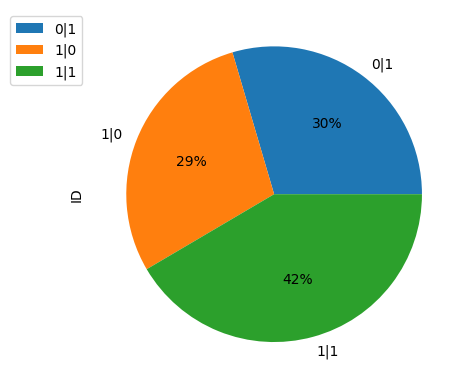

In [38]:
import matplotlib.pyplot as plt
pt19_snp1.groupby(['GT']).count().plot(kind='pie', y='ID', autopct='%1.0f%%')
plt.legend(bbox_to_anchor=(0,1))

In [42]:
def genotypes_to_alleles(vcf_df: pd.DataFrame, GT_sep='/'):
    vcf_df['allele_1_2'] = vcf_df['REF'] + '_' + vcf_df['ALT']
    vcf_df.loc[vcf_df['GT'] == f'1{GT_sep}1', 'allele_1_2'] = vcf_df['ALT'] + '_' + vcf_df['ALT']
    vcf_df[['allele_1','allele_2']] = vcf_df['allele_1_2'].str.split('_',expand=True)
    vcf_df = vcf_df.drop('allele_1_2',axis=1)
    return vcf_df

In [43]:
pt19_snp1 = genotypes_to_alleles(pt19_snp1, GT_sep='|')
pt19_snp1

/tmp/ipykernel_125864/3470355904.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vcf_df['allele_1_2'] = vcf_df['REF'] + '_' + vcf_df['ALT']
/tmp/ipykernel_125864/3470355904.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vcf_df[['allele_1','allele_2']] = vcf_df['allele_1_2'].str.split('_',expand=True)


,CHROM,POS,ID,REF,ALT,GT,allele_1,allele_2
0,chr1,126113,0,C,A,1|1,A,A
1,chr1,534324,1,G,T,0|1,G,T
2,chr1,550515,2,T,C,0|1,T,C
3,chr1,565419,3,C,G,1|0,C,G
5,chr1,655642,5,G,A,0|1,G,A
...,...,...,...,...,...,...,...,...
309317,chr1,249193265,309317,T,A,1|0,T,A
309319,chr1,249194003,309319,A,G,0|1,A,G
309321,chr1,249205806,309321,T,C,1|0,T,C
309322,chr1,249209140,309322,A,G,1|1,G,G


In [44]:
pt19_snp1

,CHROM,POS,ID,REF,ALT,GT,allele_1,allele_2
0,chr1,126113,0,C,A,1|1,A,A
1,chr1,534324,1,G,T,0|1,G,T
2,chr1,550515,2,T,C,0|1,T,C
3,chr1,565419,3,C,G,1|0,C,G
5,chr1,655642,5,G,A,0|1,G,A
...,...,...,...,...,...,...,...,...
309317,chr1,249193265,309317,T,A,1|0,T,A
309319,chr1,249194003,309319,A,G,0|1,A,G
309321,chr1,249205806,309321,T,C,1|0,T,C
309322,chr1,249209140,309322,A,G,1|1,G,G


### Intersect with Neanderthal

In [46]:
snp1['POS'] = snp1['phys_pos']
snp1

,snp_id,chrom,gen_pos,phys_pos,der_allele,anc_allele,POS
0,1:416202,1,0.009803,416202,T,G,416202
1,1:522476,1,0.013368,522476,T,A,522476
2,1:523471,1,0.013402,523471,T,C,523471
3,1:526057,1,0.013488,526057,C,T,526057
4,1:526692,1,0.013510,526692,T,C,526692
...,...,...,...,...,...,...,...
2626225,1:249211925,1,2.862737,249211925,A,G,249211925
2626226,1:249211967,1,2.862738,249211967,A,G,249211967
2626227,1:249212011,1,2.862738,249212011,T,G,249212011
2626228,1:249212025,1,2.862738,249212025,T,C,249212025


In [45]:
pt19_snp1

,CHROM,POS,ID,REF,ALT,GT,allele_1,allele_2
0,chr1,126113,0,C,A,1|1,A,A
1,chr1,534324,1,G,T,0|1,G,T
2,chr1,550515,2,T,C,0|1,T,C
3,chr1,565419,3,C,G,1|0,C,G
5,chr1,655642,5,G,A,0|1,G,A
...,...,...,...,...,...,...,...,...
309317,chr1,249193265,309317,T,A,1|0,T,A
309319,chr1,249194003,309319,A,G,0|1,A,G
309321,chr1,249205806,309321,T,C,1|0,T,C
309322,chr1,249209140,309322,A,G,1|1,G,G


In [60]:
merged_snp1_pt19 = pd.merge(pt19_snp1, snp1, how='left',on=['POS'])
merged_snp1_pt19

,CHROM,POS,ID,REF,ALT,GT,allele_1,allele_2,snp_id,chrom,gen_pos,phys_pos,der_allele,anc_allele
0,chr1,126113,0,C,A,1|1,A,A,NaN,NaN,NaN,NaN,NaN,NaN
1,chr1,534324,1,G,T,0|1,G,T,NaN,NaN,NaN,NaN,NaN,NaN
2,chr1,550515,2,T,C,0|1,T,C,NaN,NaN,NaN,NaN,NaN,NaN
3,chr1,565419,3,C,G,1|0,C,G,NaN,NaN,NaN,NaN,NaN,NaN
4,chr1,655642,5,G,A,0|1,G,A,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268750,chr1,249193265,309317,T,A,1|0,T,A,1:249193265,1.0,2.862591,249193265.0,A,T
268751,chr1,249194003,309319,A,G,0|1,A,G,NaN,NaN,NaN,NaN,NaN,NaN
268752,chr1,249205806,309321,T,C,1|0,T,C,NaN,NaN,NaN,NaN,NaN,NaN
268753,chr1,249209140,309322,A,G,1|1,G,G,1:249209140,1.0,2.862716,249209140.0,A,G


In [61]:
merged_snp1_pt19 = merged_snp1_pt19.dropna()
merged_snp1_pt19

,CHROM,POS,ID,REF,ALT,GT,allele_1,allele_2,snp_id,chrom,gen_pos,phys_pos,der_allele,anc_allele
158,chr1,847250,181,G,A,1|1,A,A,1:847250,1.0,0.022733,847250.0,G,A
159,chr1,849998,182,A,G,1|1,G,G,1:849998,1.0,0.022820,849998.0,A,G
160,chr1,850218,183,T,A,1|1,A,A,1:850218,1.0,0.022827,850218.0,A,T
161,chr1,850371,184,G,T,1|1,T,T,1:850371,1.0,0.022832,850371.0,T,G
162,chr1,850780,185,C,T,1|1,T,T,1:850780,1.0,0.022845,850780.0,T,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268747,chr1,249181149,309313,A,G,1|1,G,G,1:249181149,1.0,2.862512,249181149.0,A,G
268748,chr1,249182887,309314,T,C,0|1,T,C,1:249182887,1.0,2.862523,249182887.0,T,C
268749,chr1,249191706,309315,G,A,0|1,G,A,1:249191706,1.0,2.862581,249191706.0,G,A
268750,chr1,249193265,309317,T,A,1|0,T,A,1:249193265,1.0,2.862591,249193265.0,A,T


In [54]:
na_drop_rate = 1 - merged_snp1_pt19.shape[0] / pt19_snp1.shape[0]
na_drop_rate

0.1488381611504902

In [71]:
merged = merged_snp1_pt19

In [72]:
1 != 2

True

In [ ]:
merged.loc[merged['allele_1']==merged['der_allele'],'is_derived']

In [77]:
def allele_status(row):
    if (row['allele_1'] == row['der_allele'] or row['allele_2'] == row['der_allele']) and row['allele_1'] != row['anc_allele'] and row['allele_2'] != row['anc_allele']:
        return 'derived'
    
    if (row['allele_1'] == row['anc_allele'] or row['allele_2'] == row['anc_allele']) and row['allele_1'] != row['der_allele'] and row['allele_2'] != row['der_allele']:
        return 'ancestral'
    
    return 'other'

In [79]:
status = merged.apply(lambda row: allele_status(row), axis=1)
status

158       ancestral
159       ancestral
160         derived
161         derived
162         derived
            ...    
268747    ancestral
268748        other
268749        other
268750        other
268753    ancestral
Length: 228754, dtype: object

In [82]:
merged['allele_status'] = status
merged

/tmp/ipykernel_125864/404348664.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged['allele_status'] = status


,CHROM,POS,ID,REF,ALT,GT,allele_1,allele_2,snp_id,chrom,gen_pos,phys_pos,der_allele,anc_allele,allele_status
158,chr1,847250,181,G,A,1|1,A,A,1:847250,1.0,0.022733,847250.0,G,A,ancestral
159,chr1,849998,182,A,G,1|1,G,G,1:849998,1.0,0.022820,849998.0,A,G,ancestral
160,chr1,850218,183,T,A,1|1,A,A,1:850218,1.0,0.022827,850218.0,A,T,derived
161,chr1,850371,184,G,T,1|1,T,T,1:850371,1.0,0.022832,850371.0,T,G,derived
162,chr1,850780,185,C,T,1|1,T,T,1:850780,1.0,0.022845,850780.0,T,C,derived
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268747,chr1,249181149,309313,A,G,1|1,G,G,1:249181149,1.0,2.862512,249181149.0,A,G,ancestral
268748,chr1,249182887,309314,T,C,0|1,T,C,1:249182887,1.0,2.862523,249182887.0,T,C,other
268749,chr1,249191706,309315,G,A,0|1,G,A,1:249191706,1.0,2.862581,249191706.0,G,A,other
268750,chr1,249193265,309317,T,A,1|0,T,A,1:249193265,1.0,2.862591,249193265.0,A,T,other


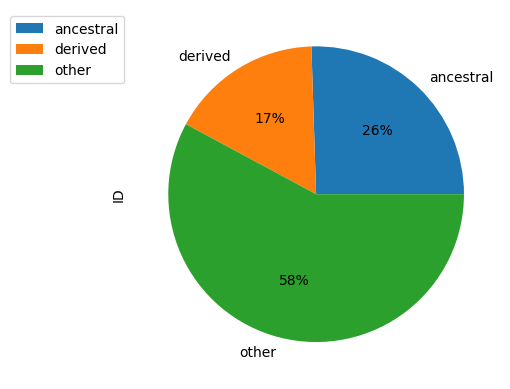

In [83]:
import matplotlib.pyplot as plt
merged.groupby(['allele_status']).count().plot(kind='pie', y='ID', autopct='%1.0f%%')
plt.legend(bbox_to_anchor=(0,1))

In [89]:
merged.groupby(['allele_status']).count()

,CHROM,POS,ID,REF,ALT,GT,allele_1,allele_2,snp_id,chrom,gen_pos,phys_pos,der_allele,anc_allele
allele_status,,,,,,,,,,,,,,
ancestral,58351,58351,58351,58351,58351,58351,58351,58351,58351,58351,58351,58351,58351,58351
derived,38064,38064,38064,38064,38064,38064,38064,38064,38064,38064,38064,38064,38064,38064
other,132339,132339,132339,132339,132339,132339,132339,132339,132339,132339,132339,132339,132339,132339


In [88]:
38064 / (38064 + 58351)

0.39479334128506977

In [56]:
merged_snp1_pt19['neand_score'] = 0
merged_snp1_pt19.loc[merged_snp1_pt19['allele_1'] == merged_snp1_pt19['der_allele'], 'neand_score'] = merged_snp1_pt19['neand_score'] + 1
merged_snp1_pt19.loc[merged_snp1_pt19['allele_2'] == merged_snp1_pt19['der_allele'], 'neand_score'] = merged_snp1_pt19['neand_score'] + 1
merged_snp1_pt19

/tmp/ipykernel_125864/3648915251.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_snp1_pt19['neand_score'] = 0


,CHROM,POS,ID,REF,ALT,GT,allele_1,allele_2,snp_id,chrom,gen_pos,phys_pos,der_allele,anc_allele,neand_score
158,chr1,847250,181,G,A,1|1,A,A,1:847250,1.0,0.022733,847250.0,G,A,0
159,chr1,849998,182,A,G,1|1,G,G,1:849998,1.0,0.022820,849998.0,A,G,0
160,chr1,850218,183,T,A,1|1,A,A,1:850218,1.0,0.022827,850218.0,A,T,2
161,chr1,850371,184,G,T,1|1,T,T,1:850371,1.0,0.022832,850371.0,T,G,2
162,chr1,850780,185,C,T,1|1,T,T,1:850780,1.0,0.022845,850780.0,T,C,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268747,chr1,249181149,309313,A,G,1|1,G,G,1:249181149,1.0,2.862512,249181149.0,A,G,0
268748,chr1,249182887,309314,T,C,0|1,T,C,1:249182887,1.0,2.862523,249182887.0,T,C,1
268749,chr1,249191706,309315,G,A,0|1,G,A,1:249191706,1.0,2.862581,249191706.0,G,A,1
268750,chr1,249193265,309317,T,A,1|0,T,A,1:249193265,1.0,2.862591,249193265.0,A,T,1


In [59]:
pt19_snp1.shape[0] * 2

537510

In [58]:
merged_snp1_pt19['neand_score'].sum() / (pt19_snp1.shape[0] * 2)

0.38776952986921176

In [62]:
inter = merged_snp1_pt19

In [65]:
len(inter[(inter['allele_1']!=inter['der_allele']) & (inter['allele_1']!=inter['anc_allele']) & (inter['allele_1']!=inter['REF']) &
     (inter['allele_2']!=inter['der_allele']) & (inter['allele_2']!=inter['anc_allele']) & (inter['allele_2']!=inter['REF'])])

16

In [67]:
16 / len(inter) * 100

0.006994413212446557

# GVCF parsing

In [112]:
GVCF_HG19 = '/home/skomlev/data/snp151.txt'
GVCF_HG19_sample = '/home/skomlev/data/snp151_rnd100.txt'
GVCF_HG19_CHR_1 = '/home/skomlev/data/snp151_chr1.txt'

In [97]:
#!gzip -d $GVCF_HG19
!head $GVCF_HG19

585	chr1	10019	10020	rs775809821	0	+	A	A	-/A	genomic	deletion	unknown	0	0	near-gene-5	exact	1		1	SSMP,	0				
585	chr1	10038	10039	rs978760828	0	+	A	A	A/C	genomic	single	unknown	0	0	near-gene-5	exact	1		1	USC_VALOUEV,	0				
585	chr1	10042	10043	rs1008829651	0	+	T	T	A/T	genomic	single	unknown	0	0	near-gene-5	exact	1		1	USC_VALOUEV,	0				
585	chr1	10050	10051	rs1052373574	0	+	A	A	A/G	genomic	single	unknown	0	0	near-gene-5	exact	1		1	USC_VALOUEV,	0				
585	chr1	10051	10051	rs1326880612	0	+	-	-	-/C	genomic	insertion	unknown	0	0	near-gene-5	between	1		1	TOPMED,	0				
585	chr1	10054	10055	rs892501864	0	+	T	T	A/T	genomic	single	unknown	0	0	near-gene-5	exact	1		1	USC_VALOUEV,	0				
585	chr1	10055	10055	rs768019142	0	+	-	-	-/A	genomic	insertion	unknown	0	0	near-gene-5	between	1		1	SSMP,	0				
585	chr1	10062	10063	rs1010989343	0	+	A	A	A/C	genomic	single	unknown	0	0	near-gene-5	exact	1		1	USC_VALOUEV,	0				
585	chr1	10067	10067	rs1489251879	0	+	-	-	lengthTooLong	genomic	in-del	unknown	0	0	near-gen

In [113]:
#!grep '\schr1\s' $GVCF_HG19 > snp151_chr1.txt
!head $GVCF_HG19_CHR_1

585	chr1	10019	10020	rs775809821	0	+	A	A	-/A	genomic	deletion	unknown	0	0	near-gene-5	exact	1		1	SSMP,	0				
585	chr1	10038	10039	rs978760828	0	+	A	A	A/C	genomic	single	unknown	0	0	near-gene-5	exact	1		1	USC_VALOUEV,	0				
585	chr1	10042	10043	rs1008829651	0	+	T	T	A/T	genomic	single	unknown	0	0	near-gene-5	exact	1		1	USC_VALOUEV,	0				
585	chr1	10050	10051	rs1052373574	0	+	A	A	A/G	genomic	single	unknown	0	0	near-gene-5	exact	1		1	USC_VALOUEV,	0				
585	chr1	10051	10051	rs1326880612	0	+	-	-	-/C	genomic	insertion	unknown	0	0	near-gene-5	between	1		1	TOPMED,	0				
585	chr1	10054	10055	rs892501864	0	+	T	T	A/T	genomic	single	unknown	0	0	near-gene-5	exact	1		1	USC_VALOUEV,	0				
585	chr1	10055	10055	rs768019142	0	+	-	-	-/A	genomic	insertion	unknown	0	0	near-gene-5	between	1		1	SSMP,	0				
585	chr1	10062	10063	rs1010989343	0	+	A	A	A/C	genomic	single	unknown	0	0	near-gene-5	exact	1		1	USC_VALOUEV,	0				
585	chr1	10067	10067	rs1489251879	0	+	-	-	lengthTooLong	genomic	in-del	unknown	0	0	near-gen

In [106]:
#!shuf -n 100 $GVCF_HG19 > snp151_rnd100.txt
snp151 = pd.read_csv(GVCF_HG19_sample, sep='\t')
snp151

,1855,chr6,166497478,166497479,rs77839613,0,+,A,A.1,A/G,...,exact,1,Unnamed: 18,9,"1000GENOMES,EVA-GONL,GNOMAD,HAMMER_LAB,HUMAN_LONGEVITY,JMKIDD_LAB,TISHKOFF,TOPMED,WEILL_CORNELL_DGM,",2,"A,G,","4831.000000,177.000000,","0.964657,0.035343,",maf-5-some-pop
0,1116,chr2,69636558,69636558,rs1464030995,0,+,-,-,-/TC,...,between,1,NaN,1,"TOPMED,",0,NaN,NaN,NaN,NaN
1,960,chr12,49232294,49232294,rs1378654480,0,+,-,-,-/TGTACTT,...,between,1,MixedObserved,1,"TOPMED,",0,NaN,NaN,NaN,NaN
2,1262,chr4,88745660,88745661,rs1404213760,0,+,C,C,C/T,...,exact,1,NaN,1,"TOPMED,",0,NaN,NaN,NaN,NaN
3,1669,chr5,142212292,142212293,rs1231539467,0,+,G,G,A/G,...,exact,1,NaN,1,"GNOMAD,",0,NaN,NaN,NaN,NaN
4,815,chr21,30264864,30264866,rs1223538752,0,+,AG,AG,-/AG,...,range,1,NaN,1,"TOPMED,",0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,1725,chr4,149513396,149513397,rs1026762614,0,+,T,T,G/T,...,exact,1,NaN,1,"TOPMED,",0,NaN,NaN,NaN,NaN
95,1200,chr10,80613291,80613291,rs397765948,0,+,-,-,-/T,...,between,1,MixedObserved,2,"GMI,HGSV,",0,NaN,NaN,NaN,NaN
96,735,chr17,19677131,19677132,rs931584492,0,+,C,C,C/T,...,exact,1,NaN,2,"GNOMAD,TOPMED,",0,NaN,NaN,NaN,NaN
97,1888,chr1,170806362,170806362,rs138631053,0,+,-,-,-/A/T,...,between,1,NaN,2,"1000GENOMES,PJP,",0,NaN,NaN,NaN,NaN


# Data Exploration

In [68]:
!head $N1_CHR_1_SNP_PATH

1:416202 1 0.009803 416202 T G
1:522476 1 0.013368 522476 T A
1:523471 1 0.013402 523471 T C
1:526057 1 0.013488 526057 C T
1:526692 1 0.013510 526692 T C
1:526735 1 0.013511 526735 T C
1:526771 1 0.013512 526771 C G
1:527157 1 0.013525 527157 G A
1:527186 1 0.013526 527186 G A
1:527207 1 0.013527 527207 G A


In [53]:
!head $N1_CHR_2_SNP_PATH

2:23622 2 0.000027 23622 A G
2:23695 2 0.000027 23695 T A
2:23780 2 0.000027 23780 T C
2:23782 2 0.000027 23782 A G
2:23906 2 0.000028 23906 T C
2:23907 2 0.000028 23907 A G
2:23921 2 0.000028 23921 T C
2:23936 2 0.000028 23936 T C
2:24048 2 0.000028 24048 G A
2:24140 2 0.000028 24140 C T


In [142]:
!tail $N1_CHR_2_SNP_PATH

2:242794179 2 2.683410 242794179 A G
2:242794191 2 2.683411 242794191 C G
2:242794301 2 2.683415 242794301 T C
2:242794328 2 2.683415 242794328 T C
2:242794356 2 2.683416 242794356 T C
2:242794361 2 2.683417 242794361 T C
2:242794410 2 2.683418 242794410 A G
2:242794620 2 2.683426 242794620 T C
2:242794683 2 2.683428 242794683 A G
2:242794732 2 2.683429 242794732 T C


In [55]:
!wc -l $N1_CHR_2_SNP_PATH

2918073 /home/skomlev/data/neanderthal/N1/snp/chr-2.snp


In [57]:
2918073 / 243000000 * 100

1.200853086419753

In [98]:
!head -35 $N1_CHR_1_HAPMAP

# Parameters
# thresh1=0.9
# thresh2=0.1
# tlength=0h
# genpos=0
# strict=0
# bin=10
# predfile=../out/anc.pop-ALL.chr-1
# snpfile=../in/ALL.polarized.chr-1.snp
# genofile=../in/ALL.polarized.chr-1.hap
## SNP id
## Chromosome 
## Genetic position
## Physical position
## Neandertal DAF
## YRI DAF
## Number of derived alleles
## All derived alleles on neandertal haplotype ? 
## Some derived alleles on neandertal and some on human ?
## Average posterior probability of N on derived alleles 
## Average posterior probability of N 
## Derived allele frequency
## Neandertal haplotype frequency
## DAF on N haplotypes
## Number of N haplotypes
## DAF on MH haplotypes
## Number of MH haplotypes
1:416202	1	0.980	416202	-1.000	0.011	0	-1	-1	-1	0.025	0.000	0.000	0.000	0.000	0.000	0.995	
1:522476	1	1.337	522476	-1.000	0.006	0	-1	-1	-1	0.025	0.000	0.000	0.000	0.000	0.000	0.995	
1:523471	1	1.340	523471	-1.000	0.869	1145	-1	-1	-1	0.025	0.861	0.000	0.000	0.000	0.861	0.995	
1:526057	1	1.349	526057	-1.000	

In [70]:
cols_str = '''## SNP id
## Chromosome 
## Genetic position
## Physical position
## Neandertal DAF
## YRI DAF
## Number of derived alleles
## All derived alleles on neandertal haplotype ? 
## Some derived alleles on neandertal and some on human ?
## Average posterior probability of N on derived alleles 
## Average posterior probability of N 
## Derived allele frequency
## Neandertal haplotype frequency
## DAF on N haplotypes
## Number of N haplotypes
## DAF on MH haplotypes
## Number of MH haplotypes'''

In [74]:
untrim_cols = cols_str.split('\n')
untrim_cols

['## SNP id',
 '## Chromosome ',
 '## Genetic position',
 '## Physical position',
 '## Neandertal DAF',
 '## YRI DAF',
 '## Number of derived alleles',
 '## All derived alleles on neandertal haplotype ? ',
 '## Some derived alleles on neandertal and some on human ?',
 '## Average posterior probability of N on derived alleles ',
 '## Average posterior probability of N ',
 '## Derived allele frequency',
 '## Neandertal haplotype frequency',
 '## DAF on N haplotypes',
 '## Number of N haplotypes',
 '## DAF on MH haplotypes',
 '## Number of MH haplotypes']

In [78]:
cols = [col.lstrip('## ').rstrip(' ').replace(' ','_') for col in untrim_cols]
cols

['SNP_id',
 'Chromosome',
 'Genetic_position',
 'Physical_position',
 'Neandertal_DAF',
 'YRI_DAF',
 'Number_of_derived_alleles',
 'All_derived_alleles_on_neandertal_haplotype_?',
 'Some_derived_alleles_on_neandertal_and_some_on_human_?',
 'Average_posterior_probability_of_N_on_derived_alleles',
 'Average_posterior_probability_of_N',
 'Derived_allele_frequency',
 'Neandertal_haplotype_frequency',
 'DAF_on_N_haplotypes',
 'Number_of_N_haplotypes',
 'DAF_on_MH_haplotypes',
 'Number_of_MH_haplotypes']

In [79]:
import pandas as pd

In [86]:
!grep '#' $N1_CHR_1_HAPMAP | wc -l

27


In [88]:
hm = pd.read_csv(N1_CHR_1_HAPMAP, sep='\t', skiprows=27, names=cols, index_col=False)
hm

,SNP_id,Chromosome,Genetic_position,Physical_position,Neandertal_DAF,YRI_DAF,Number_of_derived_alleles,All_derived_alleles_on_neandertal_haplotype_?,Some_derived_alleles_on_neandertal_and_some_on_human_?,Average_posterior_probability_of_N_on_derived_alleles,Average_posterior_probability_of_N,Derived_allele_frequency,Neandertal_haplotype_frequency,DAF_on_N_haplotypes,Number_of_N_haplotypes,DAF_on_MH_haplotypes,Number_of_MH_haplotypes
0,1:416202,1,0.980,416202,-1.0,0.011,0,-1,-1,-1,0.025,0.000,0.0,0.0,0.0,0.000,0.995
1,1:522476,1,1.337,522476,-1.0,0.006,0,-1,-1,-1,0.025,0.000,0.0,0.0,0.0,0.000,0.995
2,1:523471,1,1.340,523471,-1.0,0.869,1145,-1,-1,-1,0.025,0.861,0.0,0.0,0.0,0.861,0.995
3,1:526057,1,1.349,526057,-1.0,0.000,8,-1,-1,-1,0.025,0.006,0.0,0.0,0.0,0.006,0.995
4,1:526692,1,1.351,526692,-1.0,0.000,0,-1,-1,-1,0.025,0.000,0.0,0.0,0.0,0.000,0.995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2626225,1:249211925,1,286.274,249211925,0.0,0.000,2,-1,-1,-1,0.020,0.001,0.0,0.0,0.0,0.001,1.000
2626226,1:249211967,1,286.274,249211967,0.0,0.000,1,-1,-1,-1,0.020,0.001,0.0,0.0,0.0,0.001,1.000
2626227,1:249212011,1,286.274,249212011,0.0,0.000,0,-1,-1,-1,0.020,0.000,0.0,0.0,0.0,0.000,1.000
2626228,1:249212025,1,286.274,249212025,0.0,0.000,0,-1,-1,-1,0.020,0.000,0.0,0.0,0.0,0.000,1.000


In [111]:
!head -20 $N5_CEU_HTYPES_CHR_1

## Chromosome 
## Individual 
## Start pos 
## End pos 
## Physical length 
## Genetic length 
## Average predicted probability 
## Average true probability 
## Number of SNPs 
1	62	2394318	2753372	359054	0.032	0.939	0.000	2343
1	101	2903883	2923320	19437	0.007	0.917	0.000	373
1	83	2898447	2979415	80968	0.038	0.989	0.000	1275
1	106	2898494	2979893	81399	0.038	0.990	0.000	1276
1	87	2898494	2980205	81711	0.039	0.989	0.000	1279
1	67	2898447	2982476	84029	0.042	0.991	0.000	1306
1	162	2898447	2984683	86236	0.045	0.991	0.000	1325
1	108	2898494	2993485	94991	0.066	0.989	0.000	1385
1	116	2898494	2993485	94991	0.066	0.989	0.000	1385
1	43	2898447	2994328	95881	0.069	0.990	0.000	1401
1	72	2898447	2994328	95881	0.069	0.990	0.000	1401


In [115]:
cols_str2 = '''## Chromosome 
## Individual 
## Start pos 
## End pos 
## Physical length 
## Genetic length 
## Average predicted probability 
## Average true probability 
## Number of SNPs'''

In [116]:
cols2 = [col.lstrip('## ').rstrip(' ').replace(' ','_') for col in cols_str2.split('\n')]
cols2

['Chromosome',
 'Individual',
 'Start_pos',
 'End_pos',
 'Physical_length',
 'Genetic_length',
 'Average_predicted_probability',
 'Average_true_probability',
 'Number_of_SNPs']

In [ ]:
untrim_cols = cols_str.split('\n')
untrim_cols

In [117]:
ht = pd.read_csv(N5_CEU_HTYPES_CHR_1, sep='\t', skiprows=9, names=cols2, index_col=False)
ht

,Chromosome,Individual,Start_pos,End_pos,Physical_length,Genetic_length,Average_predicted_probability,Average_true_probability,Number_of_SNPs
0,1,62,2394318,2753372,359054,0.032,0.939,0.0,2343
1,1,101,2903883,2923320,19437,0.007,0.917,0.0,373
2,1,83,2898447,2979415,80968,0.038,0.989,0.0,1275
3,1,106,2898494,2979893,81399,0.038,0.990,0.0,1276
4,1,87,2898494,2980205,81711,0.039,0.989,0.0,1279
...,...,...,...,...,...,...,...,...,...
4284,1,4,247190090,247321520,131430,0.081,0.986,0.0,1941
4285,1,154,247190090,247321520,131430,0.081,0.986,0.0,1941
4286,1,116,247190090,247324904,134814,0.082,0.986,0.0,1994
4287,1,29,247245768,247332865,87097,0.035,0.970,0.0,1235


In [119]:
set(ht['Average_true_probability'])

{0.0}

In [120]:
import seaborn as sns

<Axes: xlabel='Average_predicted_probability', ylabel='Count'>

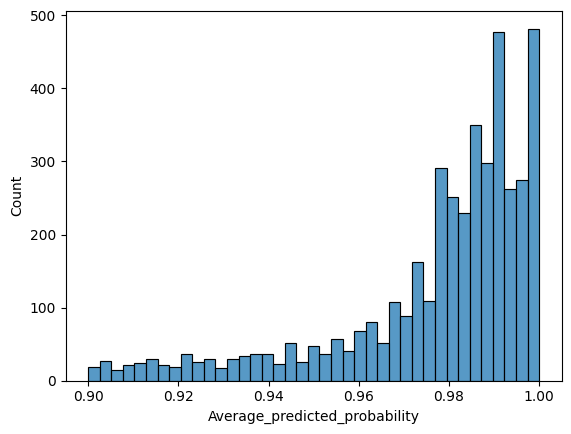

In [121]:
sns.histplot(ht['Average_predicted_probability'])

<Axes: xlabel='Number_of_SNPs', ylabel='Count'>

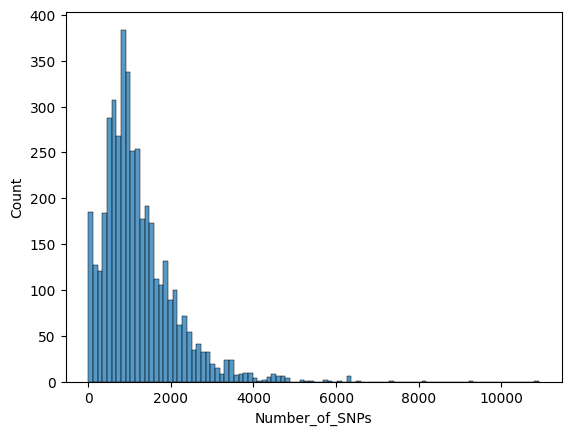

In [122]:
sns.histplot(ht['Number_of_SNPs'])

In [123]:
sum(ht['Number_of_SNPs'])

5193436